In [10]:
# This is a notebook to perform spectral extraction at specific location/region from JWST MIRI/MRS cubes
# and fit it with CAFE

In [ ]:
import os
os._exit(00)

In [1]:
import sys
# Include the path to the folder where CAFE and CRETA have been installed. Usually it's one level up from the notebook/ folder.
sys.path.insert(0, '../CRETA/')
sys.path.insert(0, '../CAFE/')

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# NAME OF GALAXY
gal_name = 'NGC7469'

In [3]:
# SPECTRAL EXTRACTION
import creta
creta_dir = '../CRETA/'

User API Created


In [4]:
# Read parameter file with extraction keywords
param_fn = gal_name+'_MIRI_single_params.txt'
pf = open(creta_dir+'param_files/'+param_fn,'r')
print(pf.read())
pf.close()

cubes = ch1-short, ch1-medium, ch1-long, ch2-short, ch2-medium, ch2-long, ch3-short, ch3-medium, ch3-long, ch4-short, ch4-medium, ch4-long
user_r_ap = 0.3                 # [arcsec] Aperture size
user_ra = 23h03m15.614s         # RA of the extraction location
user_dec = 08d52m26.09s         # Dec of the extraction location
point_source = False            # [True/False] True = Cone extraction. False = Cylinder extraction
lambda_ap = 5.4                 # [microns] The user-specified aperture size (user_r_ap) will be defined at this wavelength (ignored if point_source=False; cylinder extraction)
aperture_correction = False     # [True/False]
centering = False                # [True/False] At lambda_cent, this will update user_ra,user_dec to recenter the extraction location  
lambda_cent = 5.4               # [microns] The wavelength at which to perform the centering (ignored if centering=False)
background_sub = False          # [True/False]
r_ann_in = 0.0                  # [arcsec] When

In [5]:
# Load the extraction tool (CRETA)
c = creta.creta(creta_dir)

CAFE Region Extraction Tool Automaton (CRETA) initialized


In [6]:
# Perform the extraction
c.singleExtraction(parameter_file=True, parfile_name=param_fn, data_path=creta_dir+'data/'+gal_name+'/', output_filebase_name=gal_name)

User API Created
PSFs: ../CRETA/PSFs/
Data: ../CRETA/data/NGC7469/
########################################
     Load User Parameters 
########################################
Cubes: ['ch1-short', 'ch1-medium', 'ch1-long', 'ch2-short', 'ch2-medium', 'ch2-long', 'ch3-short', 'ch3-medium', 'ch3-long', 'ch4-short', 'ch4-medium', 'ch4-long']
Aperture radii: [0.3] (arcsec)
RA,δ: [345.81505833,8.87391389] (degrees)
Point Source: False
Aperture Correction: False (PSF Correction)
Centering: False
Centering lambda: 5.4μm
Background Subtraction: False
PSF sub-cubes Path: ../CRETA/PSFs/
Data sub-cubes Path: ../CRETA/data/NGC7469/
########################################
Loading Data
Load file: ../CRETA/data/NGC7469/hlsp_goals_jwst_miri-mrs_ngc7469_ch1-short_v2.0_sci.fits
Load file: ../CRETA/data/NGC7469/hlsp_goals_jwst_miri-mrs_ngc7469_ch1-medium_v2.0_sci.fits
Load file: ../CRETA/data/NGC7469/hlsp_goals_jwst_miri-mrs_ngc7469_ch1-long_v2.0_sci.fits
Load file: ../CRETA/data/NGC7469/hlsp_goals_jwst_

ch1_SHORT photometry exectued in: 0.7868671417236328 seconds
ch1_MEDIUM photometry exectued in: 0.8835759162902832 seconds
ch1_LONG photometry exectued in: 1.0021741390228271 seconds
ch2_SHORT photometry exectued in: 0.5606200695037842 seconds
ch2_MEDIUM photometry exectued in: 0.6866979598999023 seconds
ch2_LONG photometry exectued in: 0.7425038814544678 seconds
ch3_SHORT photometry exectued in: 0.5798840522766113 seconds
ch3_MEDIUM photometry exectued in: 0.6985890865325928 seconds
ch3_LONG photometry exectued in: 0.7952539920806885 seconds
ch4_SHORT photometry exectued in: 0.5830070972442627 seconds
ch4_MEDIUM photometry exectued in: 0.640239953994751 seconds
ch4_LONG photometry exectued in: 0.7623729705810547 seconds
Photometry exectued in': 8.738799810409546 seconds
Initiating stitching process
Stitch ratios: [[0.9869973797468217, 1.0011744541738135, 0.8802117995443295, 1.0146796010212187, 1.0056951469774265, 0.7788479217592289, 0.9824617474477211, 0.9663249371349304, 0.8131099517

In [7]:
# The spectrum/spectra are extracted.

In [8]:
# SPECTRAL FITTING
import cafe_io
from cafe_io import *
import cafe_helper
import cafe
cafe_dir = '../CAFE/'

In [33]:
# Setup data directory and file name, and parameter files.
source_fd = creta_dir+'extractions/'
source_fn = gal_name+'_SingleExt_r0.3as_cube.fits'
source_fnb = source_fn.split('.fits')[0].replace('.','')

inppar_fn = cafe_dir+'inp_parfiles/inpars_jwst_miri_AGN.ini'
optpar_fn = cafe_dir+'opt_parfiles/default_opt.cafe'

z=0.01623

In [34]:
# Load CAFE
s = cafe.specmod(cafe_dir)

In [35]:
# Read the spectrum
s.read_spec(source_fn, file_dir=source_fd, z=z)

Filename: ../CRETA/extractions/NGC7469_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (9284,)   float64   
  2  ERR           1 ImageHDU         7   (9284,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (9284,)   float64   
  4  ERR_ST        1 ImageHDU         7   (9284,)   float64   
  5  DQ            1 ImageHDU         7   (9284,)   float64   
  6  WAVE          1 ImageHDU         7   (9284,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   9284R x 1C   [20A]   


Generating continuum profiles for guess model
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
AGN
AGN
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


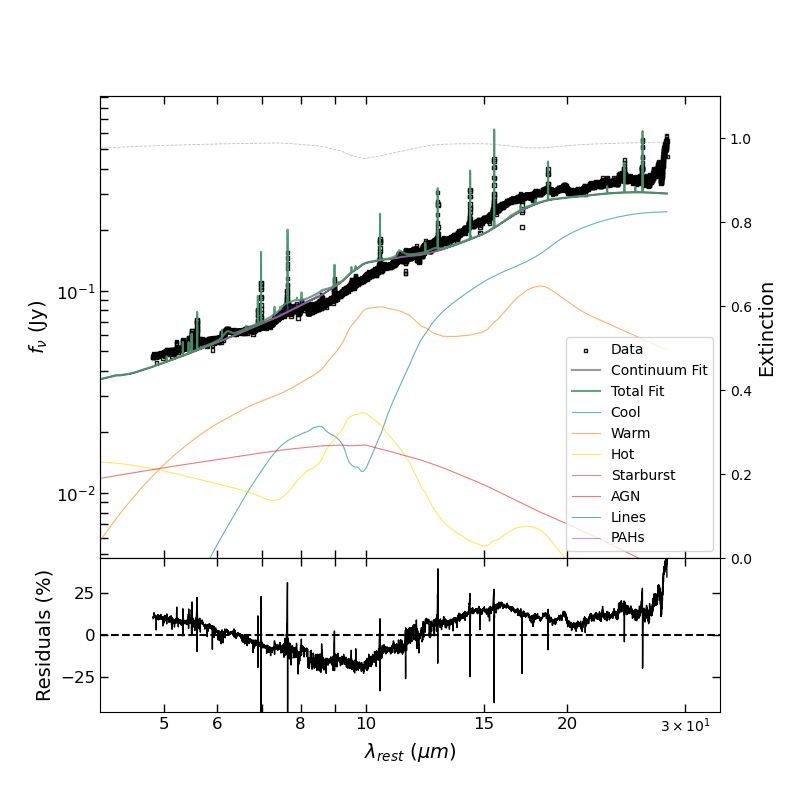

In [36]:
# Plot initial model
s.plot_spec_ini(inppar_fn, optpar_fn)

In [37]:
# Fit spectrum
s.fit_spec(inppar_fn, optpar_fn)

Generating parameter cube with initial/full parameter object
Parameter object has 67 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating parameter object
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
AGN
AGN
ISRF
ISRF
4.08 seconds to make continnum profiles
Fitting 277 parameters
Iteration 1/5(max): 2023-05-04 11:37:26.981579 -----------------
True in 44 steps
101.18 seconds elapsed
No errors retuned
<Parameter 'HOT_TAU', value=3.3938764041254188e-15, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'STB_FLX', value=1.9999918941125323, bounds=[0.0:2.0]> at upper bound, fixing to  2.0
<Parameter 'STB_TAU', value=1.354391326478813e-13, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'STB_010', value=0.9999999999572902, bounds=[0.0:1.0]> at upper bound, fixing to  1.0
<Parameter 'DSK_FLX', value=6.2788271938812005e-31, bounds=[0.0:2.0]> at lower bound, fixing to 0.0
<Paramet

2023-05-04 11:39:18,375 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/asdf/entry_points.py:49: AsdfWarning: asdf.resource_mappings plugin from package asdf==2.8.1 failed to load:

AttributeError: module 'asdf.resource' has no attribute 'get_core_resource_mappings'
  warnings.warn(



In [38]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-7.431384428643259
-2.478780663323302e-05


AGN
AGN
ISRF
ISRF


2023-05-04 11:41:18,347 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)



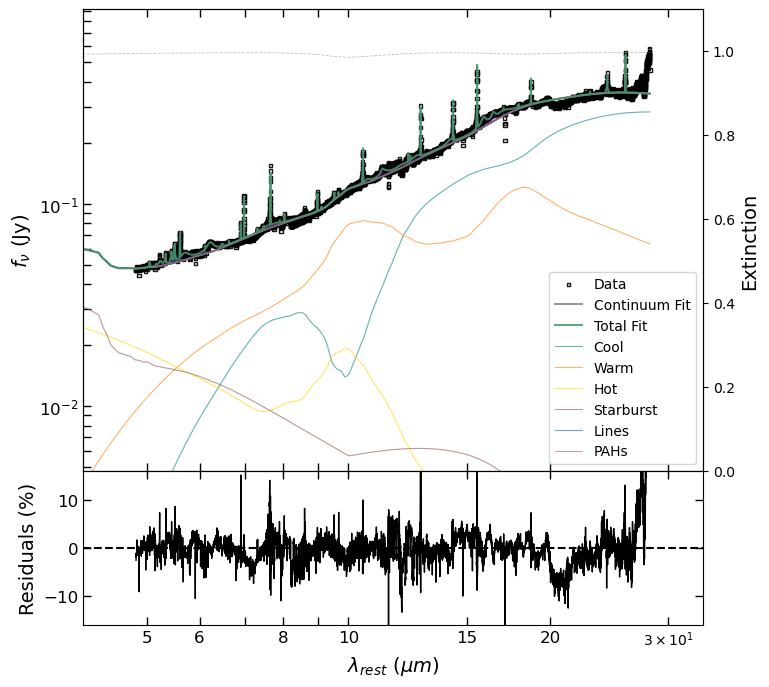

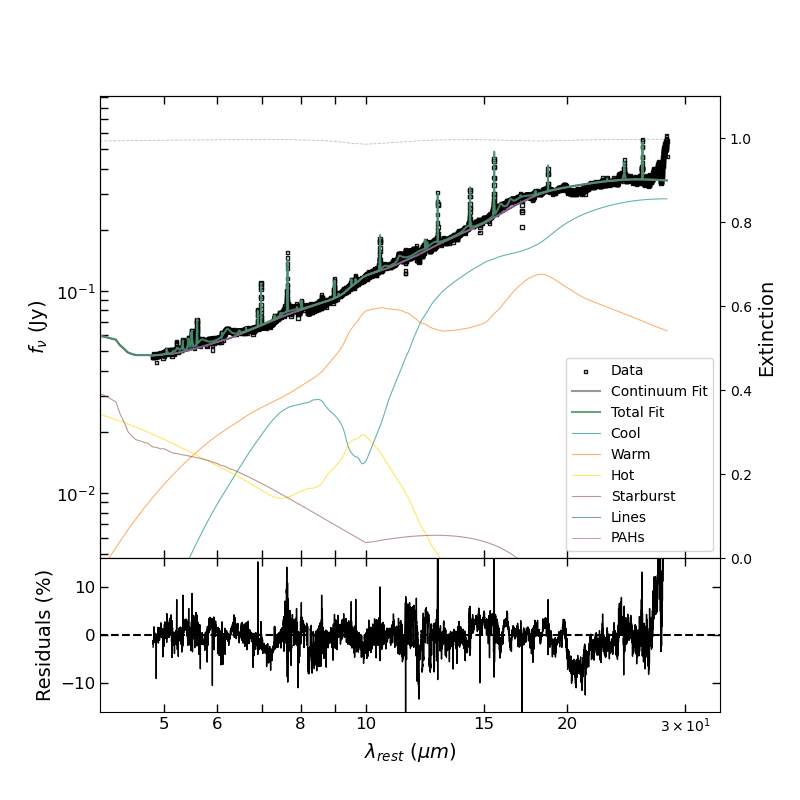

In [39]:
# Plot fitted spectrum
s.plot_spec_fit(inppar_fn, optpar_fn)

In [40]:
########### Starting a CAFE session from scratch ###############

parcube_fd = '../CAFE/output/'+source_fnb+'/'
parcube_fn = source_fnb+'_parcube.fits'

In [41]:
# Load the the spectrum
s.read_spec(source_fn, file_dir=source_fd, z=z)

Filename: ../CRETA/extractions/NGC7469_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (9284,)   float64   
  2  ERR           1 ImageHDU         7   (9284,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (9284,)   float64   
  4  ERR_ST        1 ImageHDU         7   (9284,)   float64   
  5  DQ            1 ImageHDU         7   (9284,)   float64   
  6  WAVE          1 ImageHDU         7   (9284,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   9284R x 1C   [20A]   


In [42]:
# Load the parameter cube from disk
s.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 319)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 319)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 319)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 319)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 319)   float64   
  6  EXPR          1 BinTableHDU     13   319R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   319R x 2C   [I, 32A]   


AGN
AGN
ISRF
ISRF


2023-05-04 11:43:08,284 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)



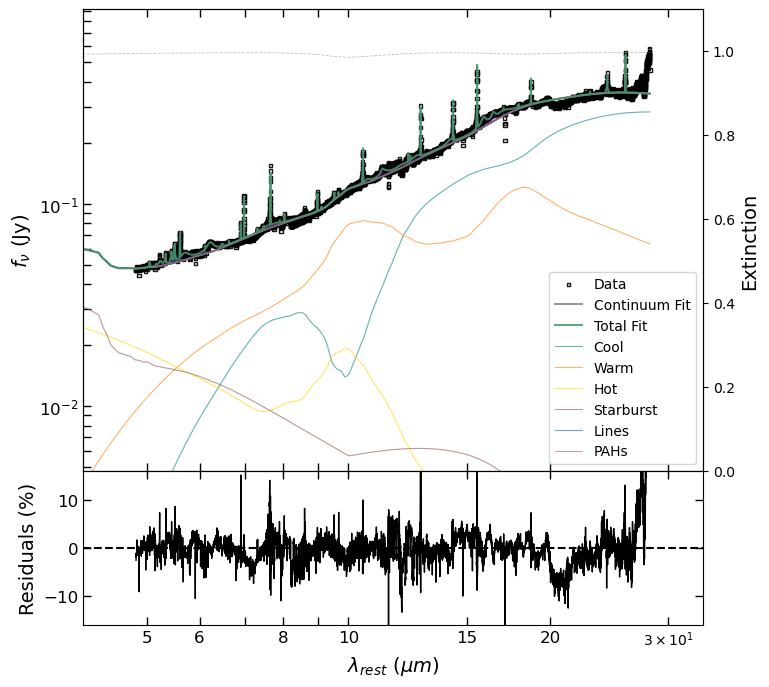

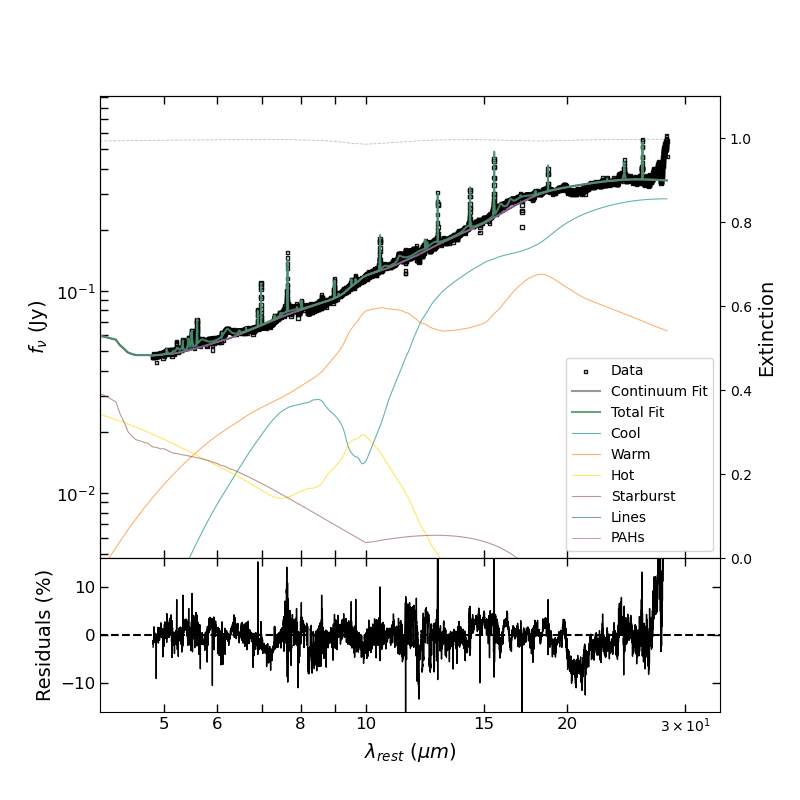

In [43]:
# Plot the previous fit
s.plot_spec_fit(inppar_fn, optpar_fn)

In [44]:
# One may want to fit again the spectrum but using as an initial guess the result from the fit of another spectrum
# (or from a previous fit from the same spectrum, although this is not recommended as most parameters have been already optimized and that gives trouble to LMFIT)
# For this example case, nevertheless, we use the previous fit from the same spectrum

In [45]:
# Note this is technically unnecessary if the initalization is done with the same spectrum, since the parameter cube is already loaded in s.parcube, but for completeness:
ini = cafe.specmod(cafe_dir)
ini.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 319)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 319)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 319)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 319)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 319)   float64   
  6  EXPR          1 BinTableHDU     13   319R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   319R x 2C   [I, 32A]   


Generating continuum profiles for guess model
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
The initial parameters will be set to the values from the parameter cube provided
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
AGN
AGN
ISRF
ISRF


2023-05-04 11:50:09,429 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)



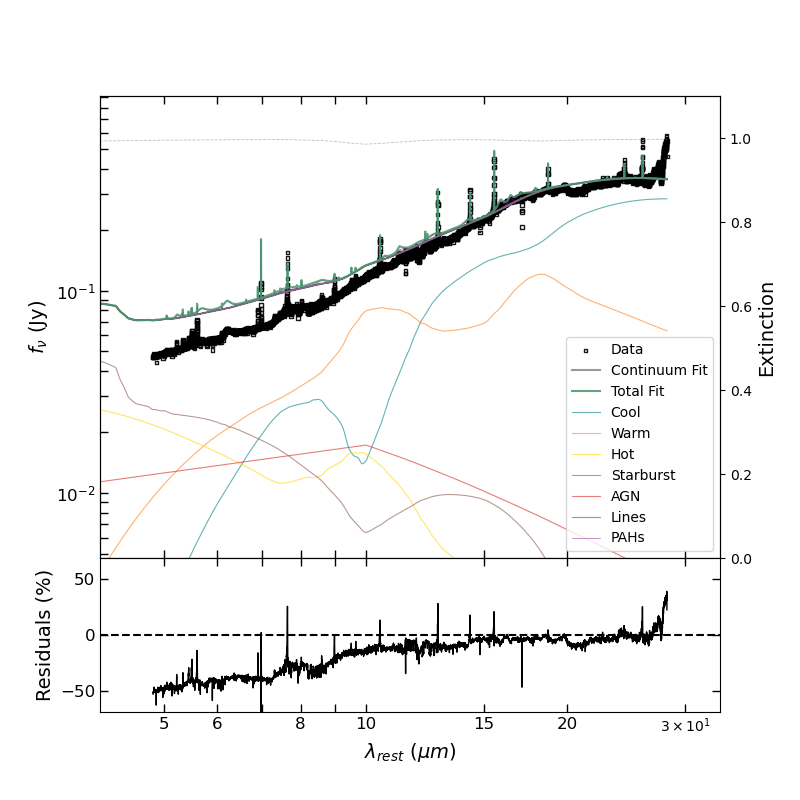

In [49]:
# Plot the initialized spectrum (should be the same as the fitted spectrum above)
s.plot_spec_ini(inppar_fn, optpar_fn, ini_parcube=ini.parcube)

In [20]:
# Refit using the last fit results as initialization
s.fit_spec(inppar_fn, optpar_fn, ini_parcube=ini.parcube)

Generating parameter cube with initial/full parameter object
Parameter object has 67 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating parameter object
Parameter object has 52 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
The params will be set to the parameters of the parcube provided for initialization
Parameter object has 52 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
AGN
AGN
ISRF
ISRF
4.28 seconds to make continnum profiles
Fitting 274 parameters
Iteration 1/5(max): 2023-05-04 11:15:08.886955 -----------------
True in 62 steps
142.7 seconds elapsed
No errors retuned
<Parameter 'HOT_TAU', value=6.915049467139853e-07, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'STB_FLX', value=1.9999999779762836, bounds=[0.0:2.0]> at upper bound, fixing to  2.0
<Parameter 'STB_FLX', value=1.9999999779762836, bounds=[0.0:2.0]> at initial value 2.0 . Fixing value.
<Parameter 'DSK_FLX', value=1.3

2023-05-04 11:17:43,659 - stpipe - WARNING - /Users/tanio/Sync/pywork/CAFE/notebooks/../CAFE/cafe.py:530: ResourceWarning: unclosed file <_io.BufferedReader name='../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_parcube.fits'>
  self.parcube = parcube



In [21]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-2.300862415952083
-7.674657825056981e-06


AGN
AGN
ISRF
ISRF


2023-05-04 11:18:51,217 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)



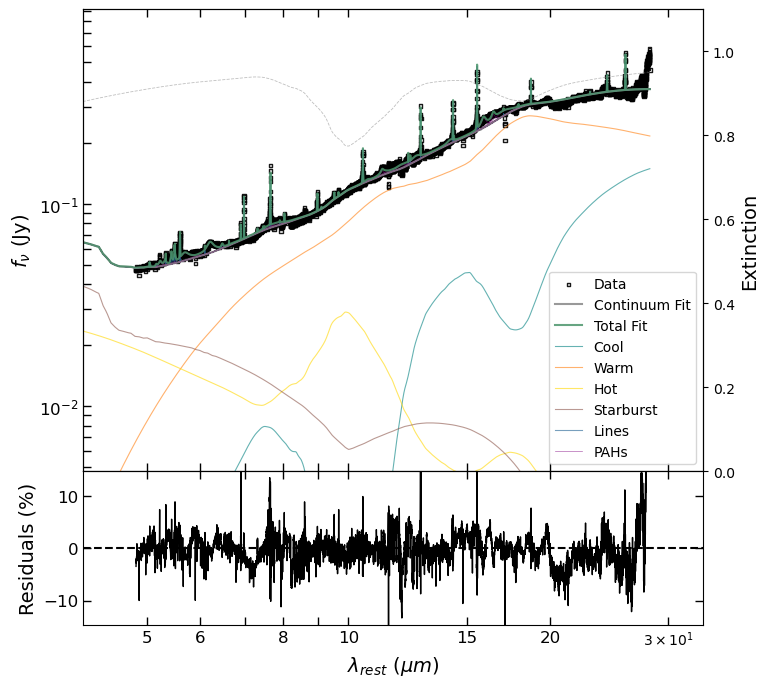

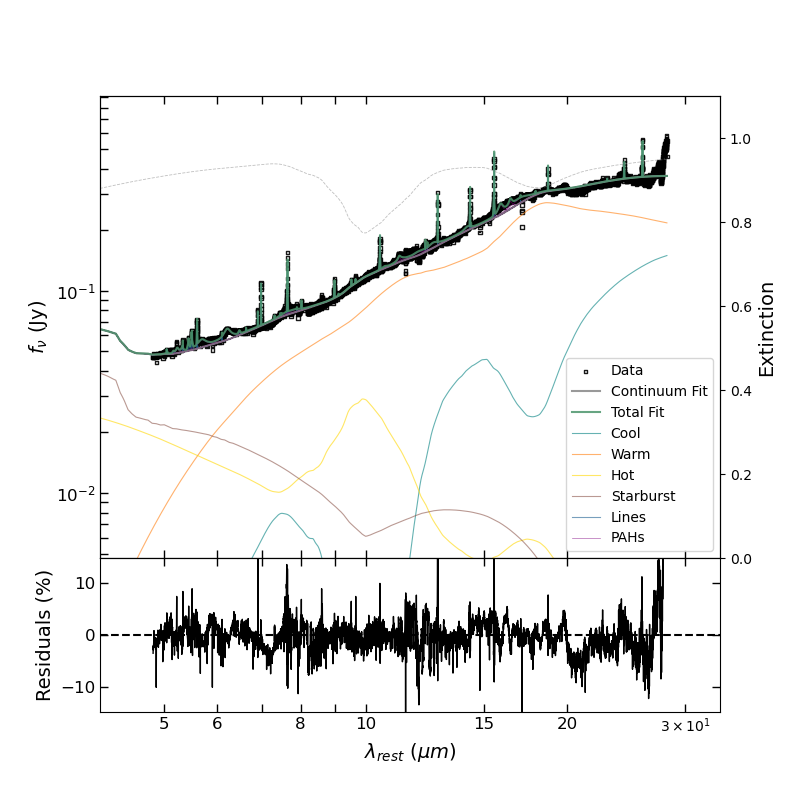

In [22]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [23]:
# We can iterate ad infinitum, but it's probably for the worse since the fit has probably converged already
ini2 = cafe.specmod(cafe_dir)
ini2.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 319)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 319)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 319)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 319)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 319)   float64   
  6  EXPR          1 BinTableHDU     13   319R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   319R x 2C   [I, 32A]   


In [24]:
s.fit_spec(inppar_fn, optpar_fn, ini_parcube=ini2.parcube)

Generating parameter cube with initial/full parameter object
Parameter object has 67 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating parameter object
Parameter object has 52 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
The params will be set to the parameters of the parcube provided for initialization
Parameter object has 52 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
AGN
AGN
ISRF
ISRF
4.47 seconds to make continnum profiles
Fitting 274 parameters
Iteration 1/5(max): 2023-05-04 11:19:08.345107 -----------------
True in 28 steps
49.08 seconds elapsed
<Parameter 'STB_010', value=0.9999984980500143 +/- 10.2, bounds=[0.0:1.0]> at upper bound, fixing to  1.0
<Parameter 'DSK_FLX', value=8.124479290713567e-07 +/- 0.0981, bounds=[0.0:2.0]> at lower bound, fixing to 0.0
<Parameter 'g_SiVII_64922N_Peak', value=2.332995781793334e-07 +/- 0.0022, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter

In [25]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-2.0460514537795236
-6.82472132681629e-06


AGN
AGN
ISRF
ISRF


2023-05-04 11:26:21,421 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)



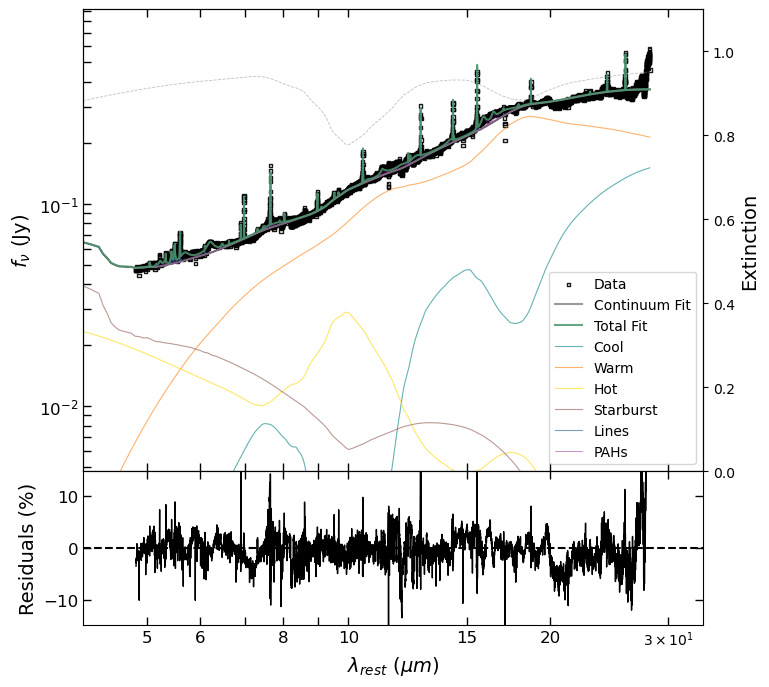

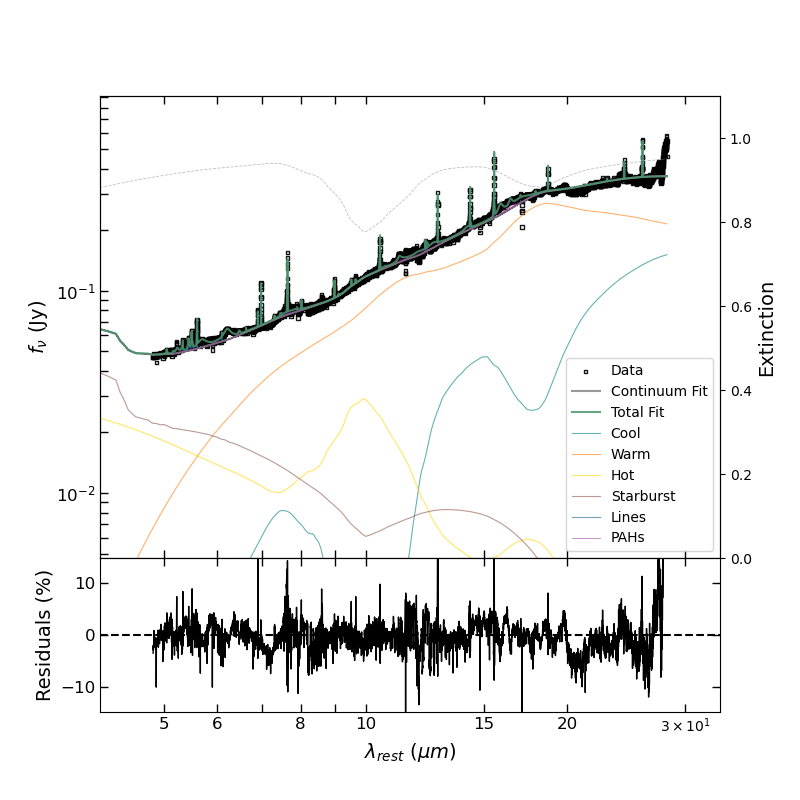

In [26]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [30]:
from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

# Read output PAH table
pah = cafe_io.pah_table(s.parcube, 0, 0)
# Read output line table
line = cafe_io.line_table(s.parcube, 0, 0)

pah62 = pah[pah.index == 'PAH62'].pah_strength.values[0]
pah62_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah77 = pah[pah.index == 'PAH77_C'].pah_strength.values[0]
pah77_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah113 = pah[pah.index == 'PAH113_C'].pah_strength.values[0]
pah113_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]

x = pah62 / pah77 
x_unc = pah62 / pah77 * np.sqrt((pah62_unc/pah62)**2 + (pah77_unc/pah77)**2)
y = pah113 / pah77
y_unc = pah113 / pah77 * np.sqrt((pah113_unc/pah113)**2 + (pah77_unc/pah77)**2)

print('6.2/7.7 = {} +/- {}'.format(x, x_unc))
print('11.3/7.7 = {} +/- {}'.format(y, y_unc))

print(pah)

# Make an astropy table 
t = QTable([pah.index.values, pah.pah_strength, pah.pah_strength_unc],
           names = ('pah_complex', 'pah_strength', 'pah_strength_unc'),
           meta={'wavelength': 'micron',
                 'flux': 'W/m^2',
                }
          )

# Write PAH table in an .ecsv file
#t.write('./NGC7469_pah_tbl.ecsv', overwrite=False)

TypeError: pah_table() takes from 1 to 2 positional arguments but 3 were given